In [3]:
# setting the environment variables
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

from config import set_environment
set_environment()

In [18]:
from langchain_experimental.agents.agent_toolkits.python.base import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_anthropic import ChatAnthropic
from langchain.agents.agent_types import AgentType

agent_executor = create_python_agent(
    llm=ChatAnthropic(model='claude-3-opus-20240229'),
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

result = agent_executor.run(
    """Understand, write a single neuron neural network in PyTorch.
Take synthetic data for y=2x. Train for 1000 epochs and print every 100 epochs.
Return prediction for x = 5"""
)
print(result)




> Entering new AgentExecutor chain...
Here is a single neuron neural network in PyTorch that trains on synthetic data for y=2x, prints the loss every 100 epochs, and returns the prediction for x=5:

Action: Python_REPL
Action Input:
import torch
import torch.nn as nn

# Create synthetic data
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Define the model
model = nn.Linear(1, 1)

# Define loss function and optimizer 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train for 1000 epochs
for epoch in range(1000):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# Make prediction for x=5        
x_new = torch.tensor([[5.0]])
pred = model(x_new)
print(f'Prediction for x=5: {pred.i

In [19]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)["data"]
df.to_csv("iris.csv", index=False)

In [20]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain import PromptTemplate

PROMPT = (
    "If you do not know the answer, say you don't know.\n"
    "Think step by step.\n"
    "\n"
    "Below is the query.\n"
    "Query: {query}\n"
)
prompt = PromptTemplate(template=PROMPT, input_variables=["query"])
llm = OpenAI()
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)

In [21]:
agent.run(prompt.format(query="What's this dataset about?"))



> Entering new AgentExecutor chain...
Thought: I need to understand the structure and contents of the dataset.

Action: python_repl_ast
Action Input: print(df.head())
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
 This dataset contains four features (sepal length, sepal width, petal length, and petal width) and 150 entries.

Final Answer: Based on the observation, this dataset is likely about measurements of flower characteristics. 

> Finished chain.


'Based on the observation, this dataset is likely about measurements of flower characteristics.'



> Entering new AgentExecutor chain...
Thought: We need to use the matplotlib library to plot a barplot.
Action: python_repl_ast
 We also need to specify the columns we want to plot.
Action: python_repl_ast
Axes(0.125,0.11;0.775x0.77) We need to specify the x and y axis labels.
Action: python_repl_ast
 We also need to add a title to the plot.;3mText(0.5, 0, 'Column Names')
Action: python_repl_ast
 Now we can show the plot.umns')Text(0.5, 1.0, 'Barplot of Columns')
Action: python_repl_ast
Action Input: plt.show()

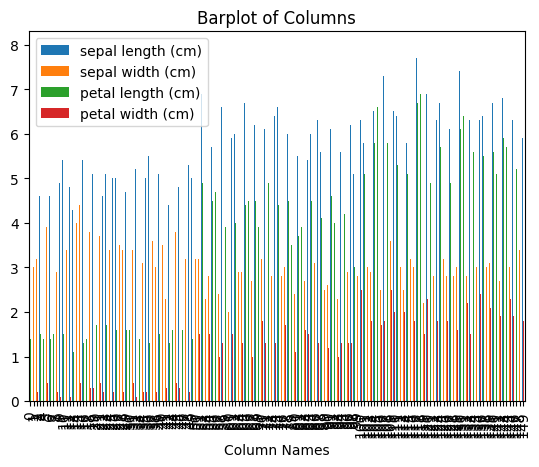

 I now know the final answer.
Final Answer: A barplot of each column in the dataframe.

> Finished chain.


'A barplot of each column in the dataframe.'

In [22]:
agent.run(prompt.format(query="Plot each column as a barplot!"))

In [13]:
agent.run(prompt.format(query="Which row has the biggest difference between petal length and petal width?"))



> Entering new AgentExecutor chain...
Thought: First, we need to find the difference between petal length and petal width for each row. Then, we need to find the row with the maximum difference.

Action: python_repl_ast
Action Input: df['petal length (cm)'] - df['petal width (cm)']0      1.2
1      1.2
2      1.1
3      1.3
4      1.2
      ... 
145    2.9
146    3.1
147    3.2
148    3.1
149    3.3
Now, we need to find the maximum value in this series.

Action: python_repl_ast
4.7 is the maximum difference, but we need to find the row that corresponds to it.

Action: python_repl_ast
122 is the index of the row with the maximum difference.ax()122

Final Answer: Row 122 has the biggest difference between petal length and petal width.

> Finished chain.


'Row 122 has the biggest difference between petal length and petal width.'

In [14]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'difference'],
      dtype='object')



> Entering new AgentExecutor chain...
Thought: To show distributions visually, you would need to use a plotting library such as matplotlib or seaborn.
Action: python_repl_ast
 Now that we have imported the necessary library, we need to specify which columns we want to plot.
Action: python_repl_ast
Action Input: df.hist()[[<Axes: title={'center': 'sepal length (cm)'}>
  <Axes: title={'center': 'sepal width (cm)'}>]
 [<Axes: title={'center': 'petal length (cm)'}>
 We can see that the histogram for sepal length and petal length columns are more normally distributed, while the histogram for sepal width and petal width columns are slightly skewed.
Final Answer: To show the distributions for each column visually, we can use the `df.hist()` function after importing the matplotlib library. We can see that the histograms for sepal length and petal length columns are more normally distributed, while the histograms for sepal width and petal width columns are slightly skewed.

> Finished chain.


'To show the distributions for each column visually, we can use the `df.hist()` function after importing the matplotlib library. We can see that the histograms for sepal length and petal length columns are more normally distributed, while the histograms for sepal width and petal width columns are slightly skewed.'

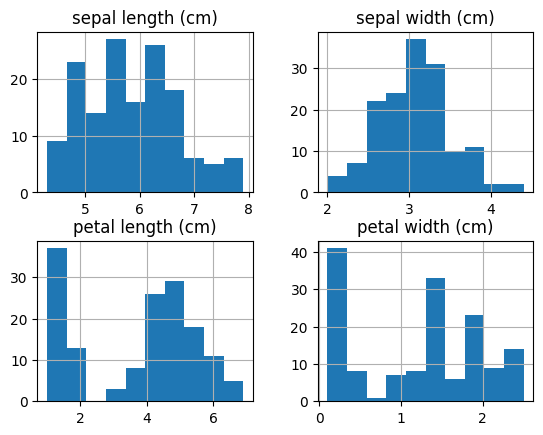

In [14]:
agent.run(prompt.format(query="Show the distributions for each column visually!"))


In [15]:
agent.run(prompt.format(query="Validate the following hypothesis statistically: petal width and petal length come from the same distribution."))



> Entering new AgentExecutor chain...
Thought: To validate a hypothesis statistically, we need to perform a statistical test.

Action: [python_repl_ast]
 import scipy.stats as stats[python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Oh, right. I can use the magic command %python_repl_ast to execute python commands.

Action: [python_repl_ast]
 %python_repl_ast import scipy.stats as stats[python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Hm, I must have to specify the dataframe first.

Action: [python_repl_ast]
 %python_repl_ast df[python_repl_ast] is not a valid tool, try one of [python_repl_ast].
I can use the describe() function to get an overview of the dataframe.

Action: [python_repl_ast]
 df.describe()[python_repl_ast] is not a valid tool, try one of [python_repl_ast].
I can use the describe() function to get an overview of the dataframe.

Action: [python_repl_ast]
 %python_repl_ast df.describe()[python_repl_ast] is not a valid tool, try one of

'There is a statistically significant difference between the petal width and petal length columns, indicating that they do not come from the same distribution.'